## Problem Statement

### Business Context

Coffee roasting is the process of turning green coffee beans into brown ones. Brown coffee beans can be made in a variety of methods, which also influences the flavor of the end product. A roasting instrument is basically a convection oven. It is a mechanism of inflicting heat energy into the raw product which makes the product consumable. And the price of coffee is heavily influenced by the quality of the beans after roasting. As a result, the cost can be determined depending on the quality of the beans after roasting.

The rising automation in the manufacturing business necessitates the automation of quality inspection of output products with minimal human intervention. Quality inspectors in businesses examine product quality after it is manufactured to ensure that it meets industry standards. 

Each product's quality inspection is a time-consuming manual process, and a low-quality product wastes upstream factory capacity, consumables, labor, and money. With the emerging AI trend, companies are looking to leverage machine learning-based technologies to automate material quality inspection during the manufacturing process to reduce human intervention while achieving human-level or better accuracy.



### Objective

We must predict the quality of a roasting instrument's outputs, which will be used to determine the price of coffee beans. The quality value ranges from 0 to 100 with 0 being the worst and 100 being the best. The higher the quality of the beans, the higher the price.

The coffee roasting instrument used by Roasters is divided into five equal-sized compartments, each with three temperature sensors. 3 sensors have been installed at 3 different locations to be able to capture temperature at different locations inside the chamber. Additionally, the height of raw material (volume entering the chamber) and relative humidity of roasted material is provided.

The data shared consists of 17 predictor variables and a continuous target variable, and the aim is to build a Regression model which can accurately predict the quality of the product. After finding out the quality, the company can decide the cost of beans effectively.


### Data Dictionary
- **T_data_1_1** - Temperature recorded by 1st sensor in the 1st chamber in Fahrenheit
- **T_data_1_2** - Temperature recorded by 2nd sensor in the 1st chamber in Fahrenheit
- **T_data_1_3** - Temperature recorded by 3rd sensor in the 1st chamber in Fahrenheit
- **T_data_2_1** - Temperature recorded by 1st sensor in the 2nd chamber in Fahrenheit
- **T_data_2_2** - Temperature recorded by 2nd sensor in the 2nd chamber in Fahrenheit
- **T_data_2_3** - Temperature recorded by 3rd sensor in the 2nd chamber in Fahrenheit
- **T_data_3_1** - Temperature recorded by 1st sensor in the 3rd chamber in Fahrenheit
- **T_data_3_2** - Temperature recorded by 2nd sensor in the 3rd chamber in Fahrenheit
- **T_data_3_3** - Temperature recorded by 3rd sensor in the 3rd chamber in Fahrenheit
- **T_data_4_1** - Temperature recorded by 1st sensor in the 4th chamber in Fahrenheit
- **T_data_4_2** - Temperature recorded by 2nd sensor in the 4th chamber in Fahrenheit
- **T_data_4_3** - Temperature recorded by 3rd sensor in the 4th chamber in Fahrenheit
- **T_data_5_1** - Temperature recorded by 1st sensor in the 5th chamber in Fahrenheit
- **T_data_5_2** - Temperature recorded by 2nd sensor in the 5th chamber in Fahrenheit
- **T_data_5_3** - Temperature recorded by 3rd sensor in the 5th chamber in Fahrenheit
- **H_data** - Height of Raw material layer, basically represents the volume of raw material going inside the chamber in pounds.
- **AH_data** - Roasted Coffee beans relative humidity.
- **quality** -  Quality of the beans 

## Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To suppress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    GradientBoostingRegressor,
    AdaBoostRegressor,
    StackingRegressor,
)
from xgboost import XGBRegressor

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [2]:
data = pd.read_csv("Roasters.csv")

## Data Overview

The initial steps to get an overview of any dataset are to:
- observe the first few rows of the dataset to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [3]:
# Checking the number of rows and columns in the training data
data.shape

(29131, 18)

* The training dataset has 29131 rows and 18 columns 

### Displaying the first few rows of the dataset

In [4]:
data.head()

,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data,quality
0,212,210,211,347,353,347,474,473,481,346,348,355,241,241,243,167.850,9.220,61
1,212,211,211,346,352,346,475,473,481,349,348,355,241,241,243,162.510,9.220,57
2,212,211,211,345,352,346,476,473,481,352,349,355,242,241,242,164.990,9.220,61
3,213,211,211,344,351,346,477,473,481,355,349,355,242,241,242,167.340,9.220,63
4,213,211,211,343,350,346,478,473,482,358,349,355,243,241,242,163.040,9.220,63


### Checking for duplicate values

In [5]:
# let's check for duplicate values in the data
data.duplicated().sum()

0

- Data has no duplicate rows.

### Checking for missing values

In [6]:
# let's check for missing values in the data
round(data.isnull().sum() / data.isnull().count() * 100, 2)

T_data_1_1   0.000
T_data_1_2   0.000
T_data_1_3   0.000
T_data_2_1   0.000
T_data_2_2   0.000
T_data_2_3   0.000
T_data_3_1   0.000
T_data_3_2   0.000
T_data_3_3   0.000
T_data_4_1   0.000
T_data_4_2   0.000
T_data_4_3   0.000
T_data_5_1   0.000
T_data_5_2   0.000
T_data_5_3   0.000
H_data       0.150
AH_data      0.110
quality      0.000
dtype: float64

- There are missing values in AH_data and H_data variables. We will impute them later with Median.

### Checking the data types of the columns for the dataset

In [7]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29131 entries, 0 to 29130
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   T_data_1_1  29131 non-null  int64  
 1   T_data_1_2  29131 non-null  int64  
 2   T_data_1_3  29131 non-null  int64  
 3   T_data_2_1  29131 non-null  int64  
 4   T_data_2_2  29131 non-null  int64  
 5   T_data_2_3  29131 non-null  int64  
 6   T_data_3_1  29131 non-null  int64  
 7   T_data_3_2  29131 non-null  int64  
 8   T_data_3_3  29131 non-null  int64  
 9   T_data_4_1  29131 non-null  int64  
 10  T_data_4_2  29131 non-null  int64  
 11  T_data_4_3  29131 non-null  int64  
 12  T_data_5_1  29131 non-null  int64  
 13  T_data_5_2  29131 non-null  int64  
 14  T_data_5_3  29131 non-null  int64  
 15  H_data      29087 non-null  float64
 16  AH_data     29100 non-null  float64
 17  quality     29131 non-null  int64  
dtypes: float64(2), int64(16)
memory usage: 4.0 MB


- 16 variables in the data are of type int 
- 2 variables are of type float
- There are no categorical variables in the data

### Statistical summary of the dataset

In [8]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
T_data_1_1,29131.000,253.552,32.488,13.000,232.000,252.000,280.000,343.000
T_data_1_2,29131.000,254.078,30.025,168.000,231.000,254.000,280.000,341.000
T_data_1_3,29131.000,254.058,28.977,183.000,232.000,252.000,279.000,339.000
T_data_2_1,29131.000,343.076,32.544,70.000,325.000,344.000,363.000,436.000
T_data_2_2,29131.000,344.524,33.719,113.000,326.000,344.000,364.000,598.000
...,...,...,...,...,...,...,...,...
T_data_5_2,29131.000,246.304,26.520,145.000,226.000,245.000,266.000,361.000
T_data_5_3,29131.000,245.757,26.051,146.000,225.000,247.000,266.000,374.000
H_data,29087.000,171.127,14.079,144.410,157.350,170.470,182.135,203.680
AH_data,29100.000,7.551,1.123,4.380,6.810,7.520,8.320,10.740


#### Observations:
- The standard deviation of all the temperature related variables is nearly equal, representing that the change in temperature of all the chambers is approximately constant.
- The minimum temperature is 13 for the 1st sensor of the 1st chamber while 168 and 183 for the 2nd and 3rd sensors of the 1st chamber.
- The same is true of 1st sensor of 2nd chamber, this huge difference in temperature within the same chamber is very unlikely.

In [9]:
# Creating the copy of the dataframe
df = data.copy()

## Exploratory Data Analysis

### Univariate analysis

In [10]:
# Function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid = 2
        sharex=True,  # X-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

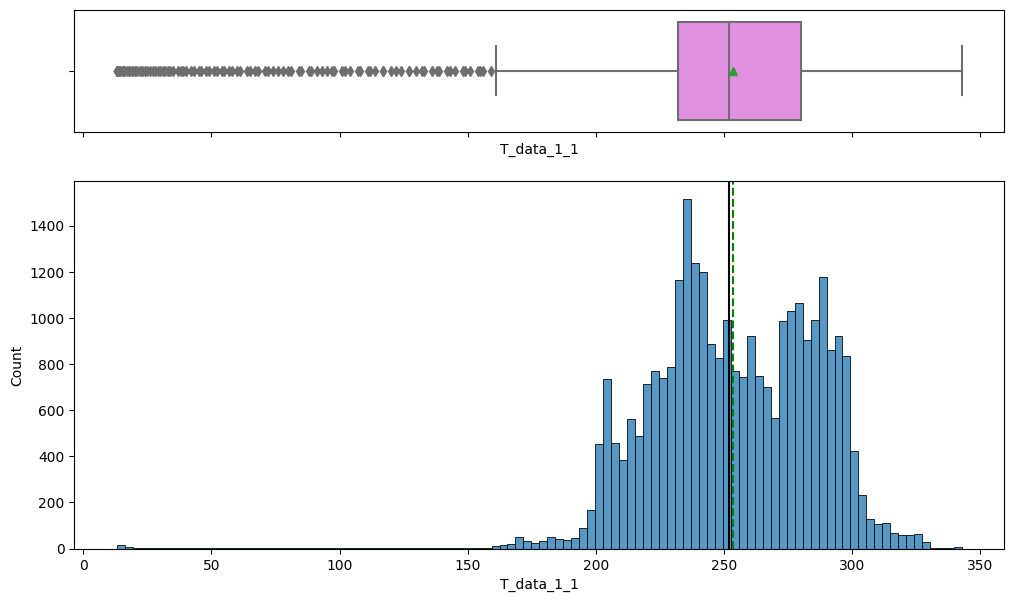

In [11]:
# Observations on T_data_1_1
histogram_boxplot(df, "T_data_1_1", figsize=(12, 7), kde=False, bins=None)

- The distribution of T_data_1_1 has bimodal distribution.
- There are many outliers on the left side, let's see the distribution for 2nd and 3rd sensors in the same chamber.

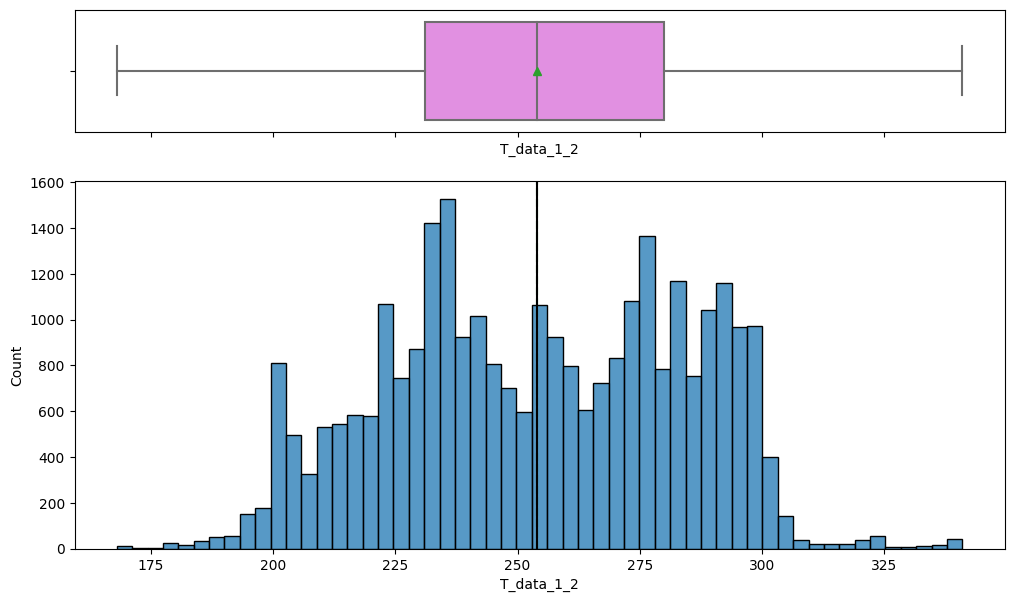

In [12]:
# Observations on T_data_1_2
histogram_boxplot(df, "T_data_1_2", figsize=(12, 7), kde=False, bins=None)

- The variable has no outliers.

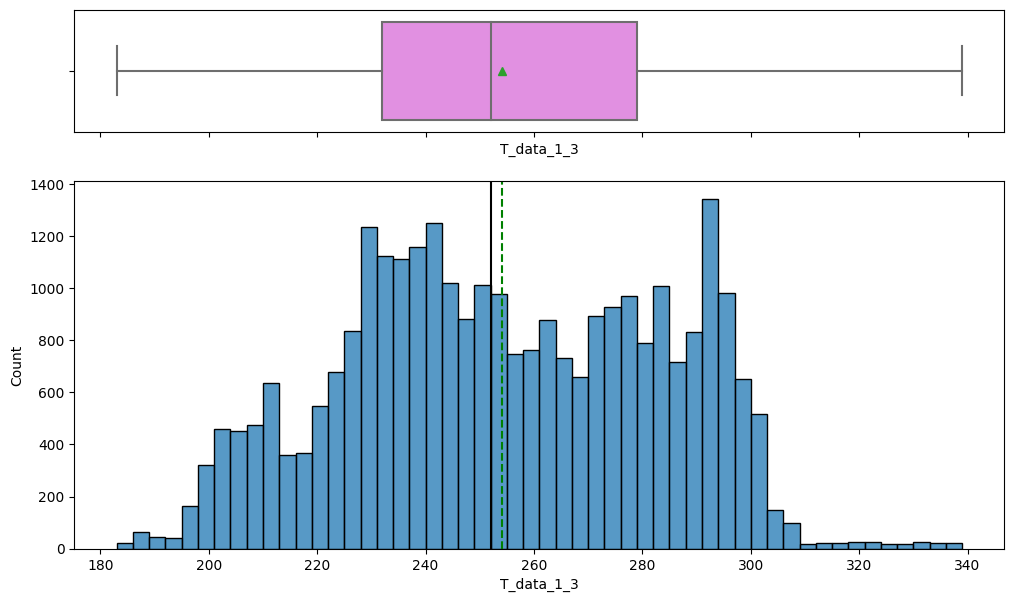

In [13]:
# Observations on T_data_1_3
histogram_boxplot(df, "T_data_1_3", figsize=(12, 7), kde=False, bins=None)

- There are no outliers in the data.


**We saw that there are no outliers in values recorded by the 2nd and 3rd sensor, so it seems like the values recorded by the 1st sensor might be incorrect. So, we will cap all the values lower than the minimum value recorded by the 2nd and 3rd sensor to the minimum value recorded by the 2nd or 3rd sensor.**

In [14]:
# Minimum value for 2nd sensor is 168 and 183 for 3rd sensor, so we will replace values less than 168 in first sensor with 168
df["T_data_1_1"].clip(lower=168, inplace=True)

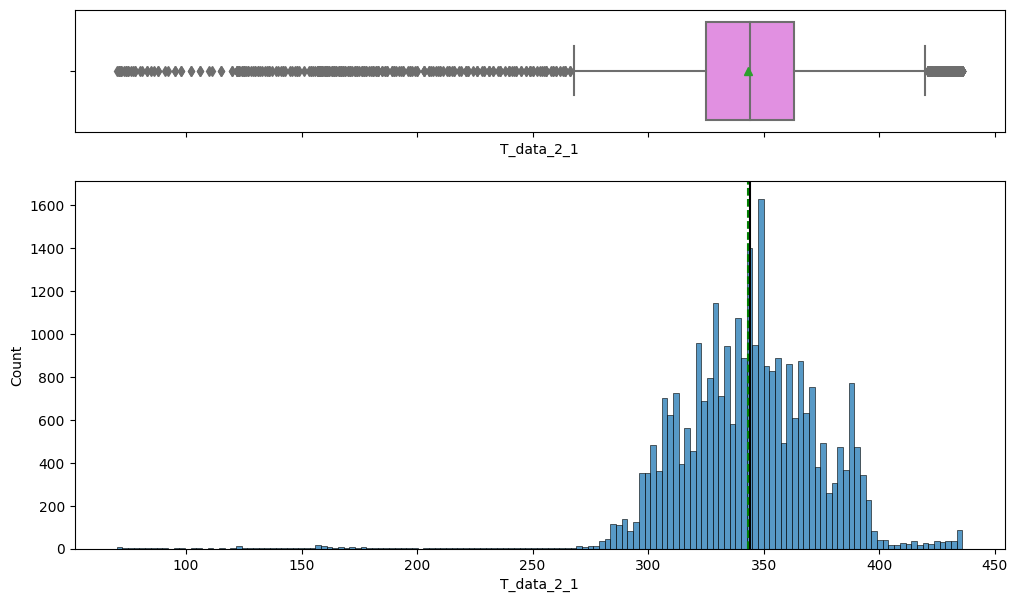

In [15]:
# Observations on T_data_2_1
histogram_boxplot(df, "T_data_2_1", figsize=(12, 7), kde=False, bins=None)

- The distribution is approximately normally distributed with slight left skew.
- There are many outliers on the left side, let's see the distribution for 2nd and 3rd sensors in the same chamber.

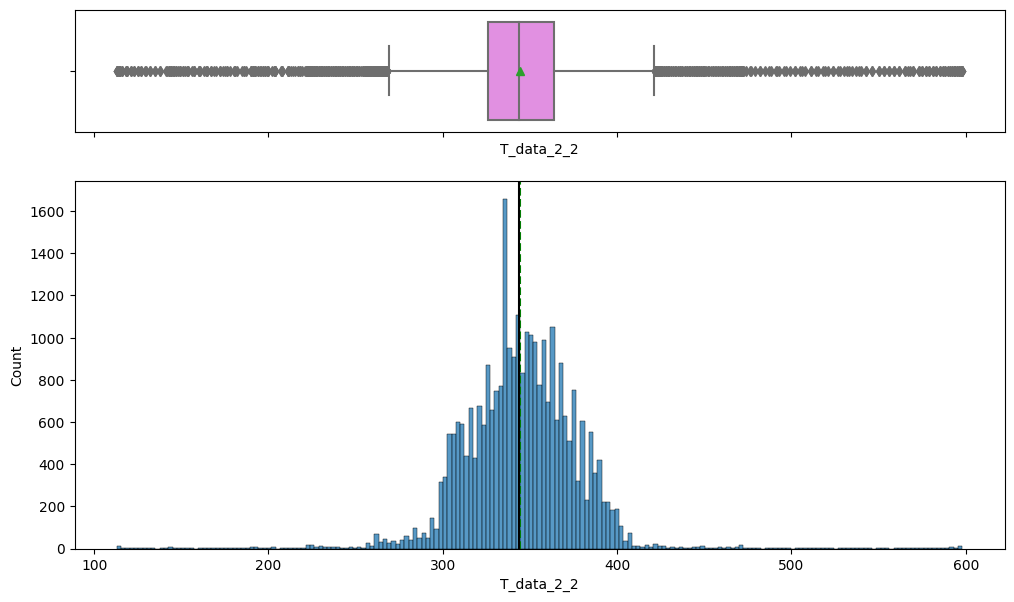

In [16]:
# Observations on T_data_2_2
histogram_boxplot(df, "T_data_2_2", figsize=(12, 7), kde=False, bins=None)

- The variable is approximately normally distributed.

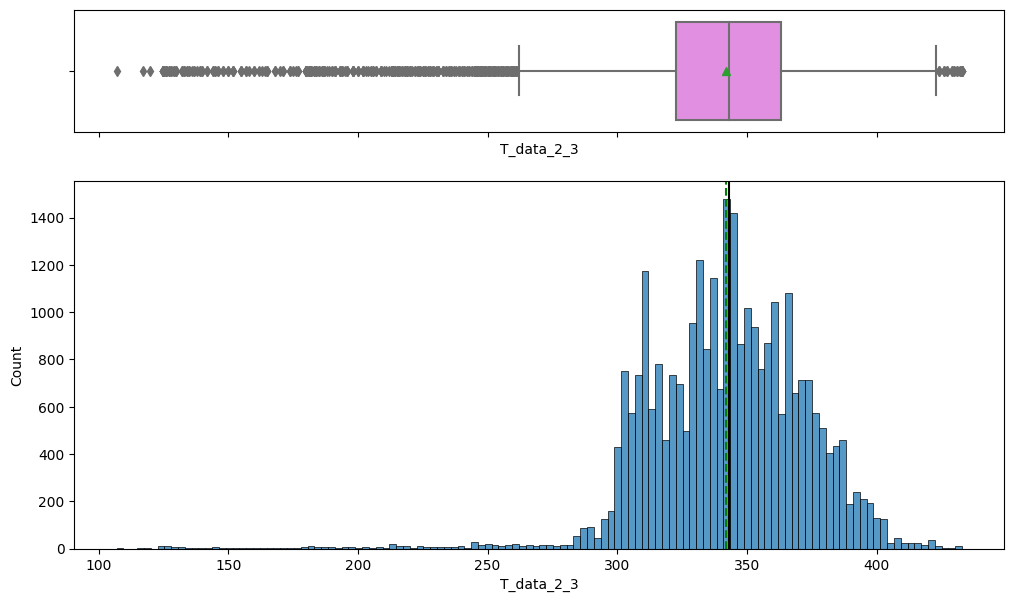

In [17]:
# Observations on T_data_2_3
histogram_boxplot(df, "T_data_2_3", figsize=(12, 7), kde=False, bins=None)

- The variable is approximately normally distributed with slight left skew.

**We saw that there are outliers in values recorded by the 2nd and 3rd sensors, but no value is below 100, so we will cap the values of the 1st sensor with the minimum value reported by the 2nd and 3rd sensors.**

In [18]:
# Minimum value for 2nd sensor is 113 and 107 for 3rd sensor, so we will replace values less than 168 in first sensor with 107
df["T_data_2_1"].clip(lower=107, inplace=True)

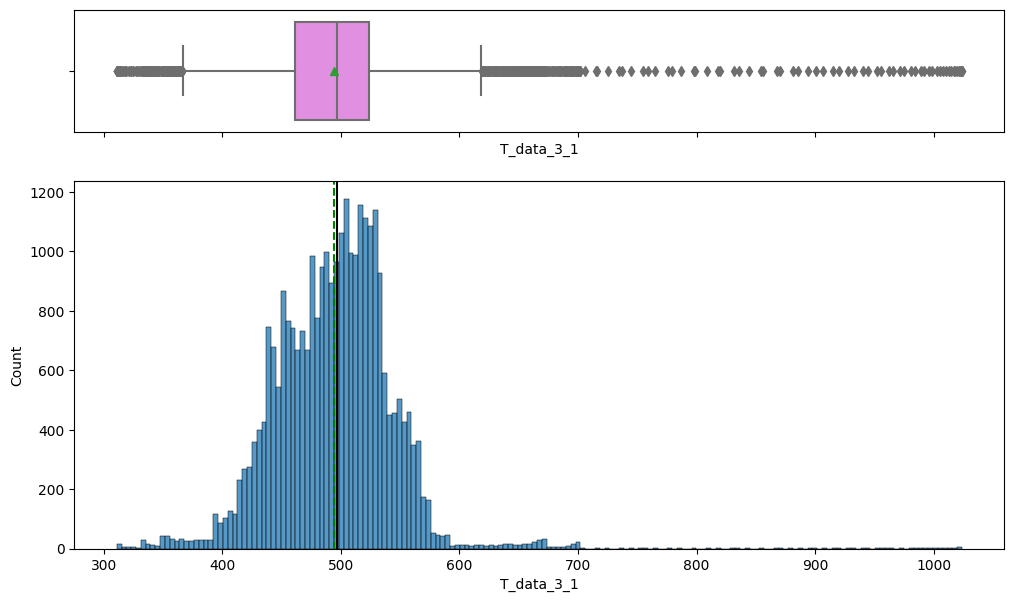

In [19]:
# Observations on T_data_3_1
histogram_boxplot(df, "T_data_3_1", figsize=(12, 7), kde=False, bins=None)

- The variable is approximately normally distributed with slight right skew.

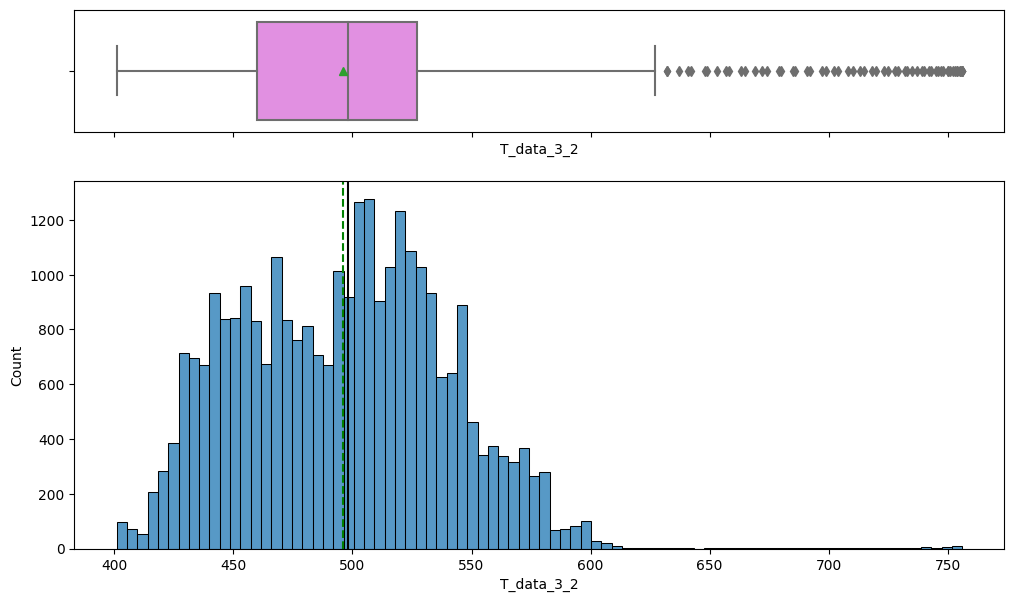

In [20]:
# Observations on T_data_3_2
histogram_boxplot(df, "T_data_3_2", figsize=(12, 7), kde=False, bins=None)

- The variable is approximately uniformly distributed with slight left skew.

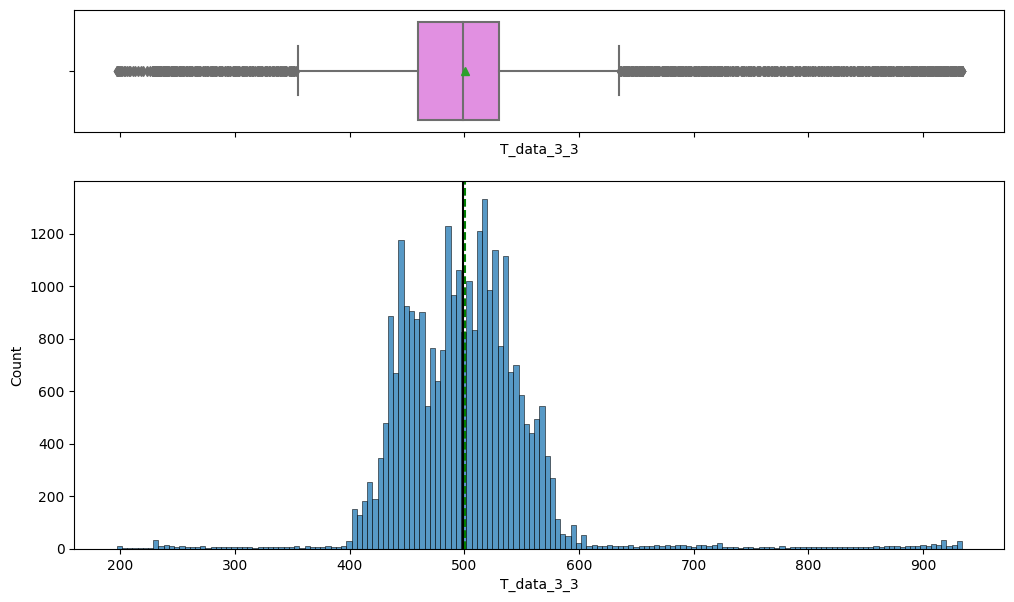

In [21]:
# Observations on T_data_3_3
histogram_boxplot(df, "T_data_3_3", figsize=(12, 7), kde=False, bins=None)

- There are many peaks in the variable with outliers on both sides.

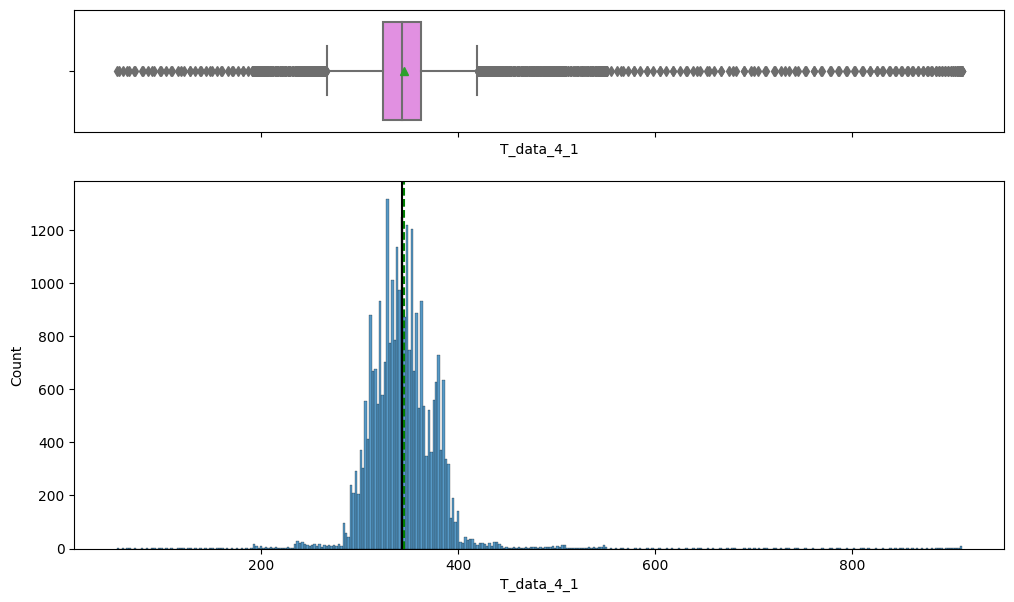

In [22]:
# Observations on T_data_4_1
histogram_boxplot(df, "T_data_4_1", figsize=(12, 7), kde=False, bins=None)

- The variable is approximately normally distributed with outliers on both sides.

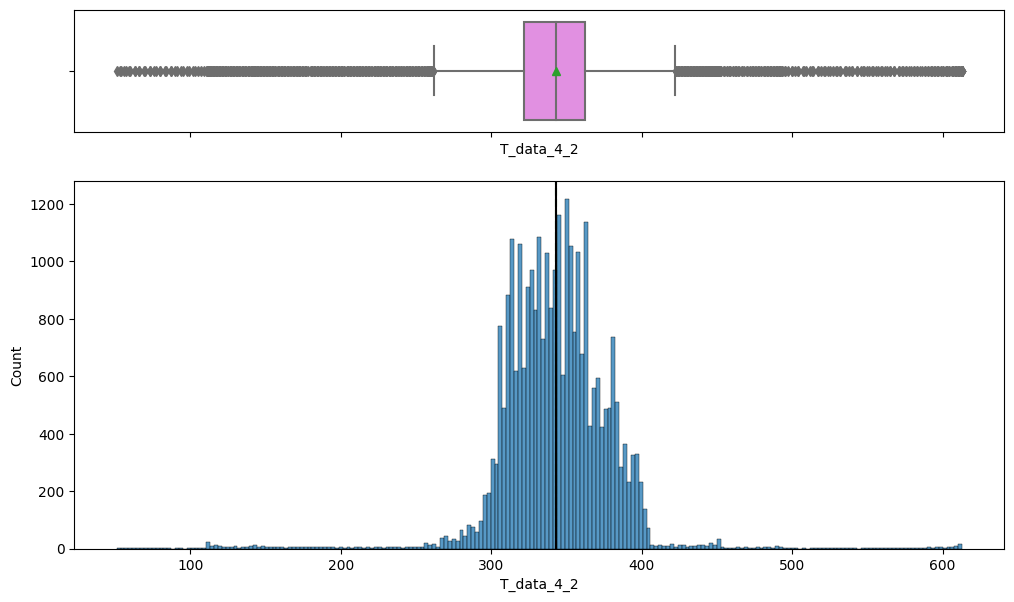

In [23]:
# Observations on T_data_4_2
histogram_boxplot(df, "T_data_4_2", figsize=(12, 7), kde=False, bins=None)

- There are many outliers on both sides of the whiskers and most of the values lie in 250 to 400.

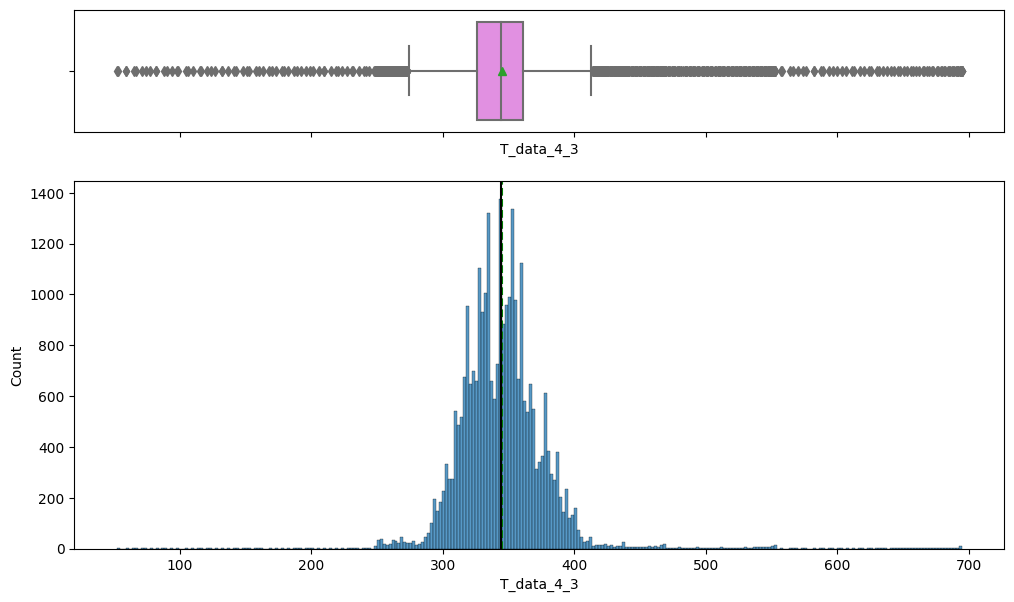

In [24]:
# Observations on T_data_4_3
histogram_boxplot(df, "T_data_4_3", figsize=(12, 7), kde=False, bins=None)

- There are many outliers on both sides of the whiskers and most of the values lie in 250 to 400.

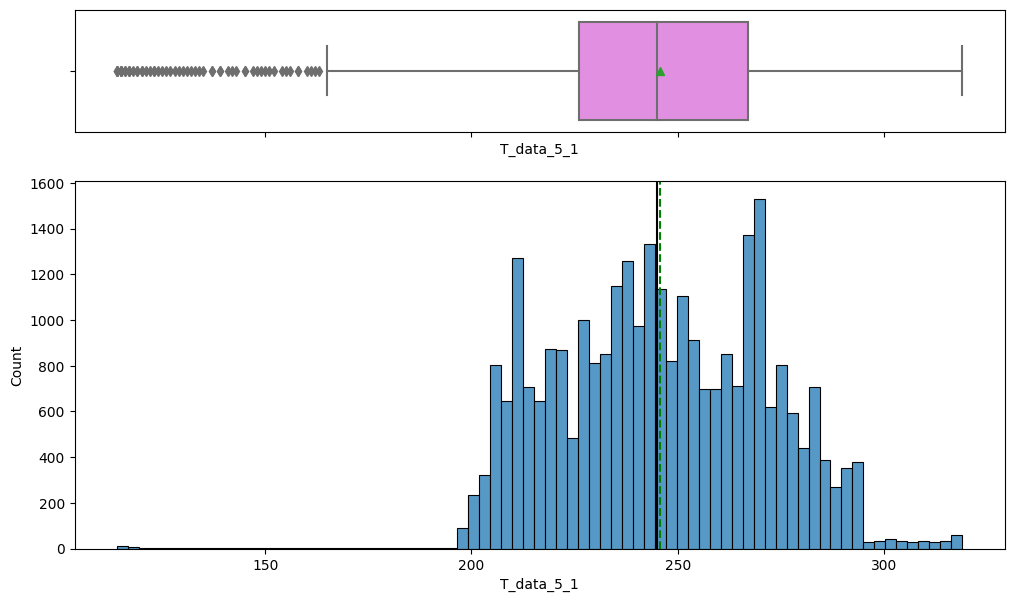

In [25]:
# Observations on T_data_5_1
histogram_boxplot(df, "T_data_5_1", figsize=(12, 7), kde=False, bins=None)

- There are many outliers on the left side of the whiskers and most of the values lie in 250 to 300.

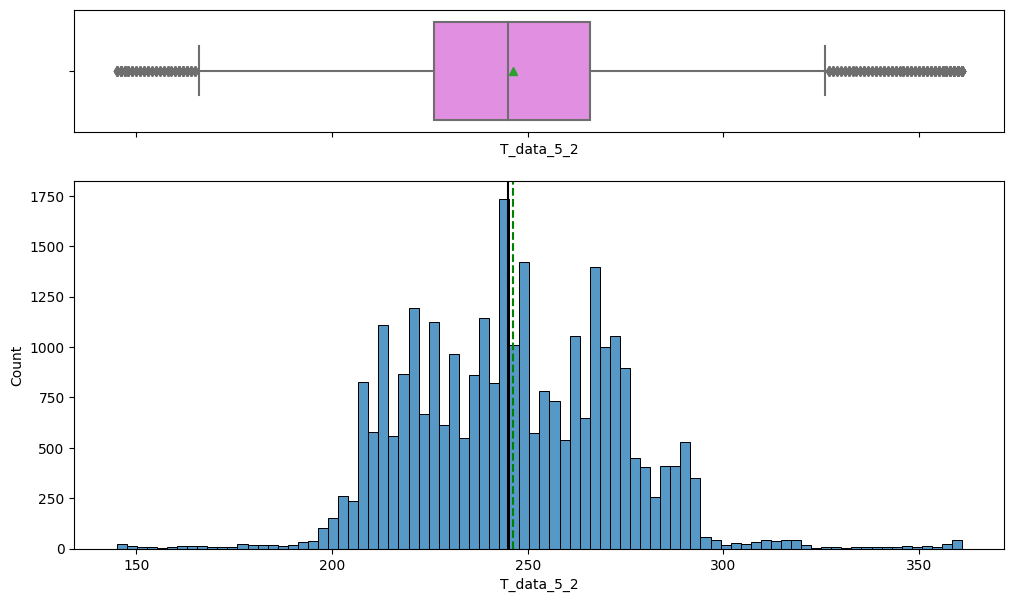

In [26]:
# Observations on T_data_5_2
histogram_boxplot(df, "T_data_5_2", figsize=(12, 7), kde=False, bins=None)

- There are many outliers on both sides of the whiskers and most of the values lie in 200 to 300.

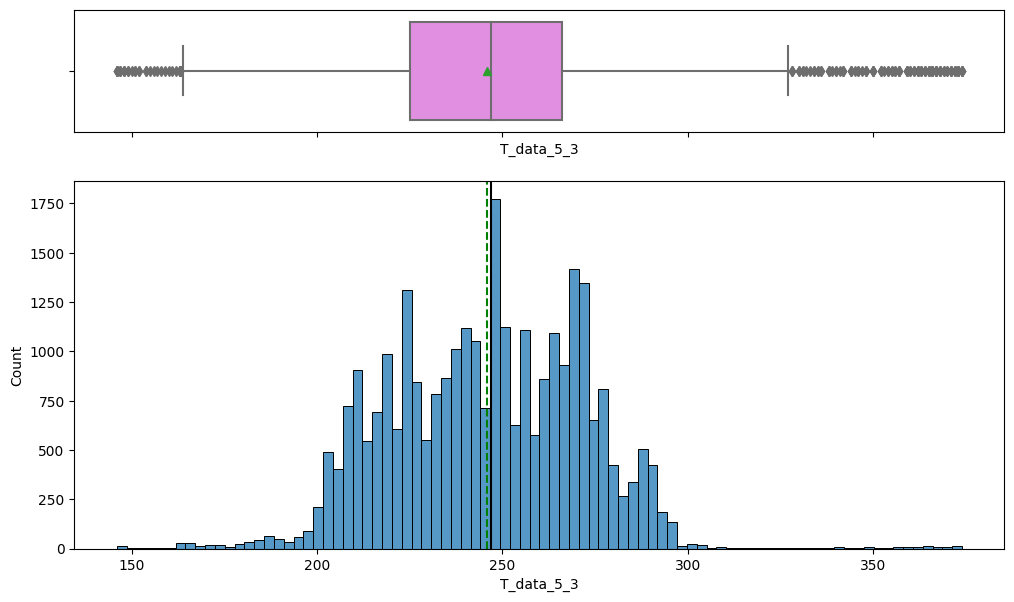

In [27]:
# Observations on T_data_5_3
histogram_boxplot(df, "T_data_5_3", figsize=(12, 7), kde=False, bins=None)

- The data is approximately normally distributed with outliers on both sides of the whisker.

- We also saw that the temperature recorded from 3 different sensors inside the same chamber is also varying, this could be because of the large size of the chamber leading to uneven distribution of heat.

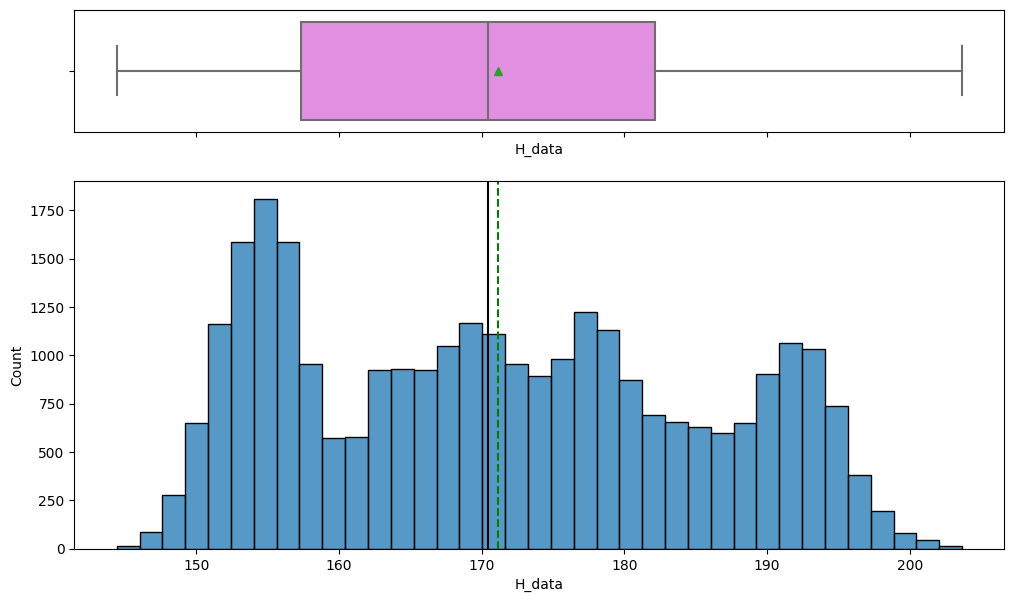

In [28]:
# Observations on H_data
histogram_boxplot(df, "H_data", figsize=(12, 7), kde=False, bins=None)

- The values of the variable lie mostly between 150 and 200.

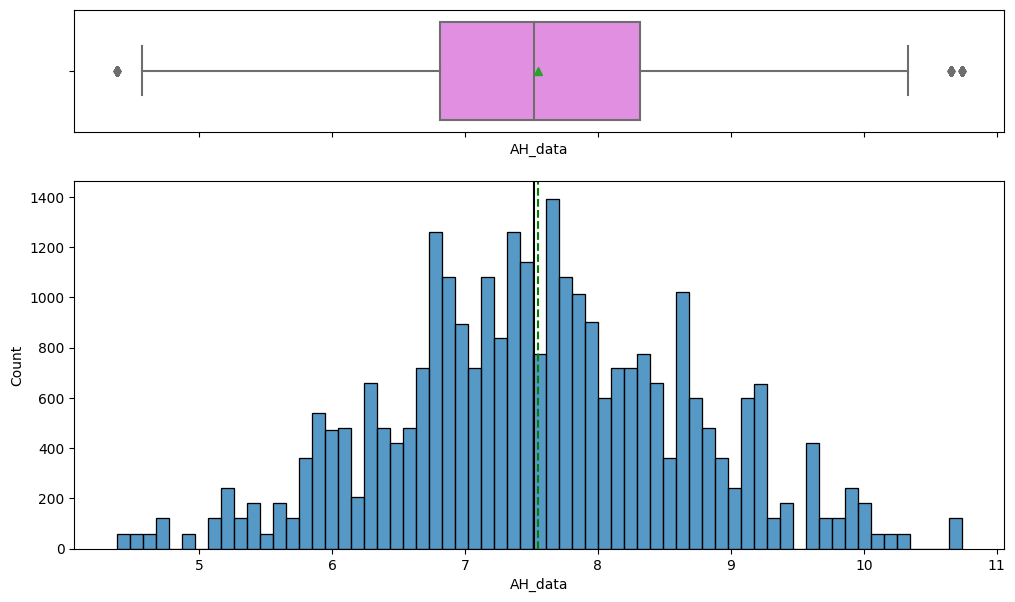

In [29]:
# Observations on AH_data
histogram_boxplot(df, "AH_data", figsize=(12, 7), kde=False, bins=None)

- There are very few outliers outside the whiskers and overall the distribution follows a normal pattern.

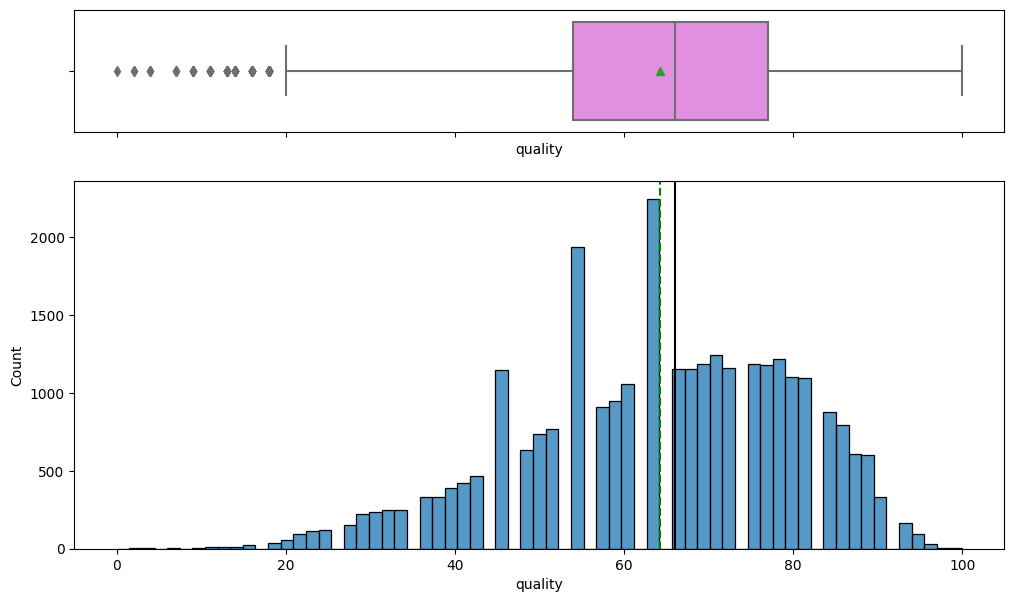

In [30]:
# Observations on quality
histogram_boxplot(df, "quality", figsize=(12, 7), kde=False, bins=None)

- The target variable is left skewed and the quality of a product usually lies between 20 to 100.

### Bivariate analysis

<Axes: xlabel='quality', ylabel='AH_data'>

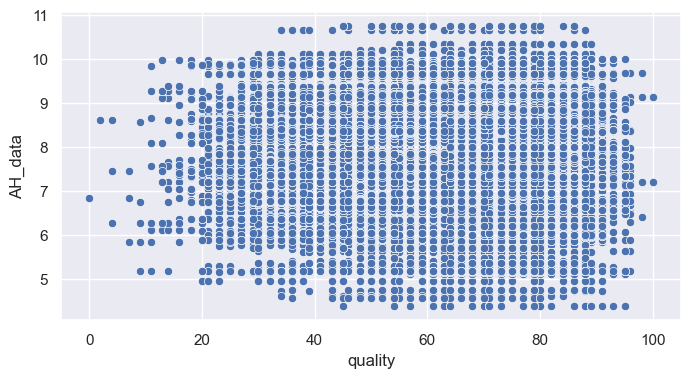

In [31]:
sns.set(rc={"figure.figsize": (8, 4)})

# Quality vs AH_data
sns.scatterplot(data=df, x="quality", y="AH_data")

- We could see that most of the observations have humidity between 5 and 10, and quality doesn't seem to make any specific pattern with AH_data.

<Axes: xlabel='quality', ylabel='H_data'>

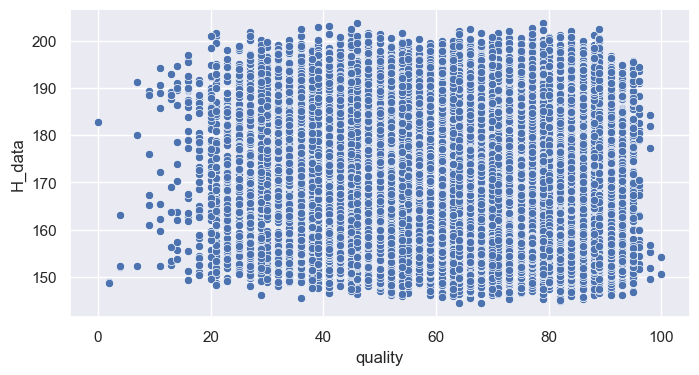

In [32]:
# Quality vs H_data
sns.scatterplot(data=df, x="quality", y="H_data")

- We could see that usually, the volume entering inside the chamber doesn't have too much effect on the quality.
- One reason for this could be the volume of 150 to 200 is acceptable.

<Axes: xlabel='quality', ylabel='T_data_1_3'>

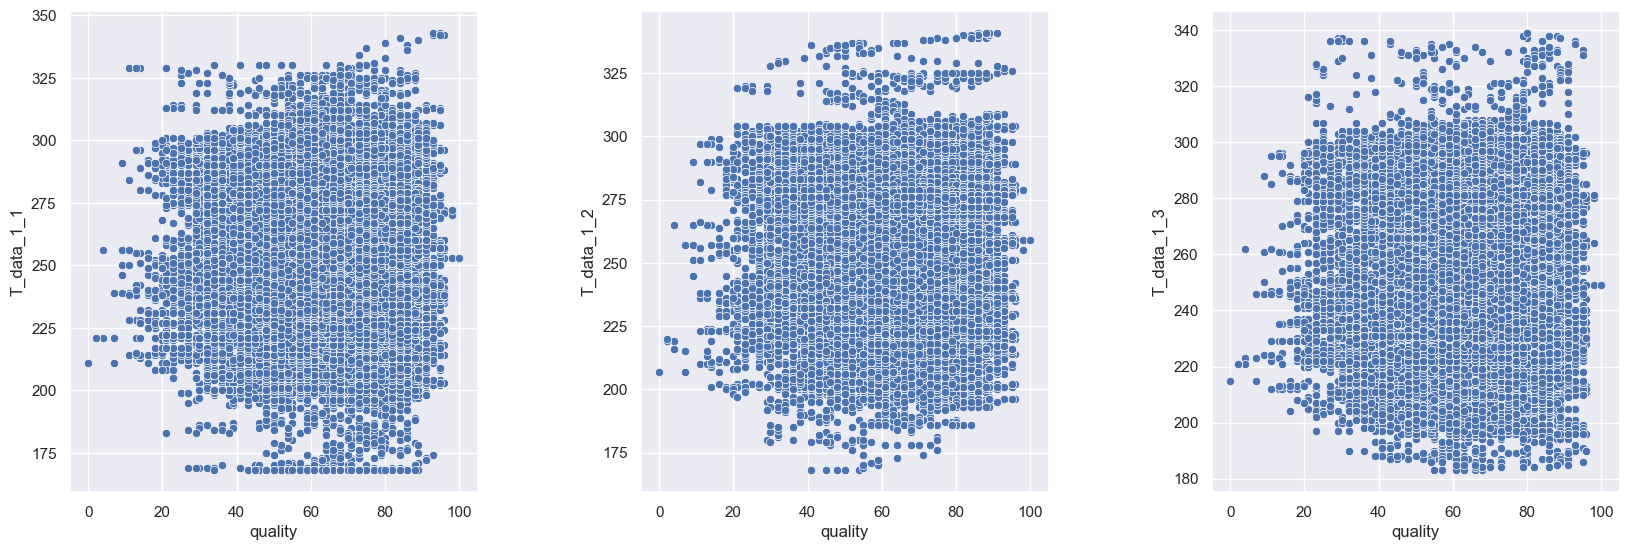

In [33]:
# quality vs temp in 1st chamber

fig = plt.figure(figsize = (20,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(2, 3, 1)
sns.scatterplot(data=df, x="quality", y="T_data_1_1")

ax = fig.add_subplot(2, 3, 2)
sns.scatterplot(data=df, x="quality", y="T_data_1_2")

ax = fig.add_subplot(2, 3, 3) 
sns.scatterplot(data=df, x="quality", y="T_data_1_3")
   


- The temperature in the first chamber doesn't seem to have any severe effect on the quality of beans.
- The temperature in the first chamber usually lies between 150 and 300.

<Axes: xlabel='quality', ylabel='T_data_2_3'>

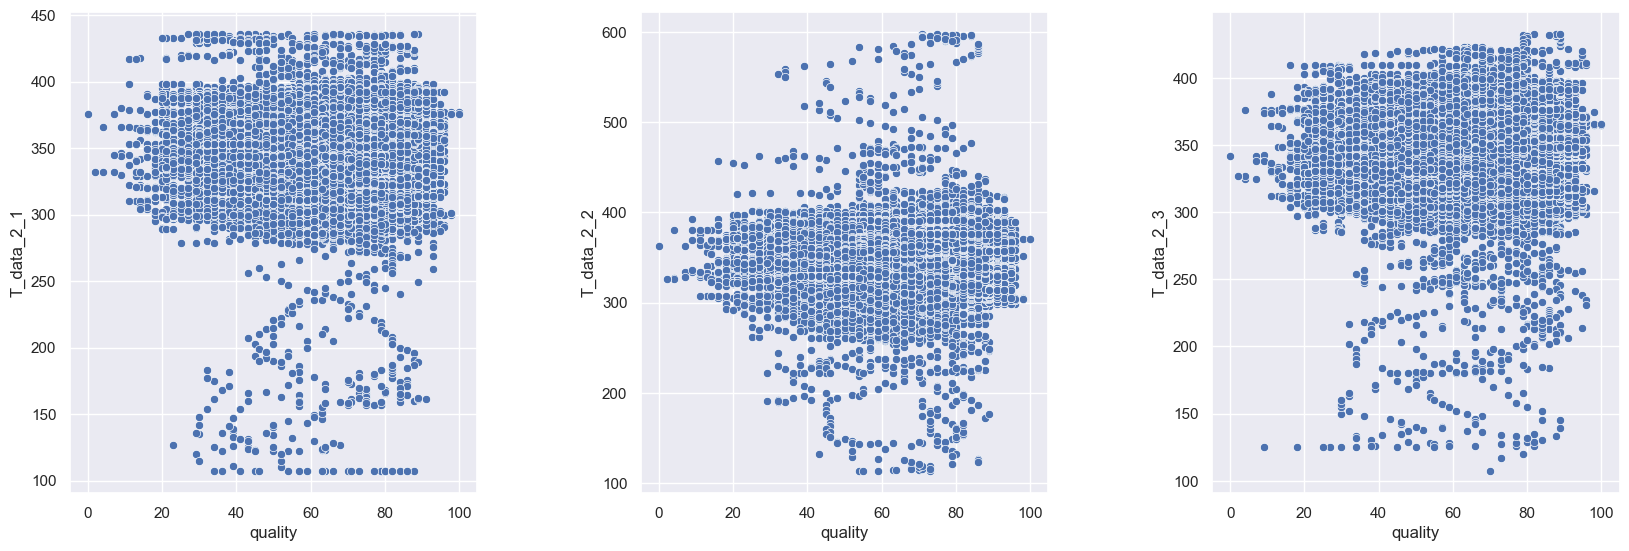

In [34]:
# quality vs temp in 2nd chamber

fig = plt.figure(figsize = (20,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(2, 3, 1)
sns.scatterplot(data=df, x="quality", y="T_data_2_1")

ax = fig.add_subplot(2, 3, 2)
sns.scatterplot(data=df, x="quality", y="T_data_2_2")

ax = fig.add_subplot(2, 3, 3) 
sns.scatterplot(data=df, x="quality", y="T_data_2_3")
   


- The temperature between 300 and 400 seems to enhance the quality of beans.
- The temperature in the second chamber usually lies between 250 and 400.

<Axes: xlabel='quality', ylabel='T_data_3_3'>

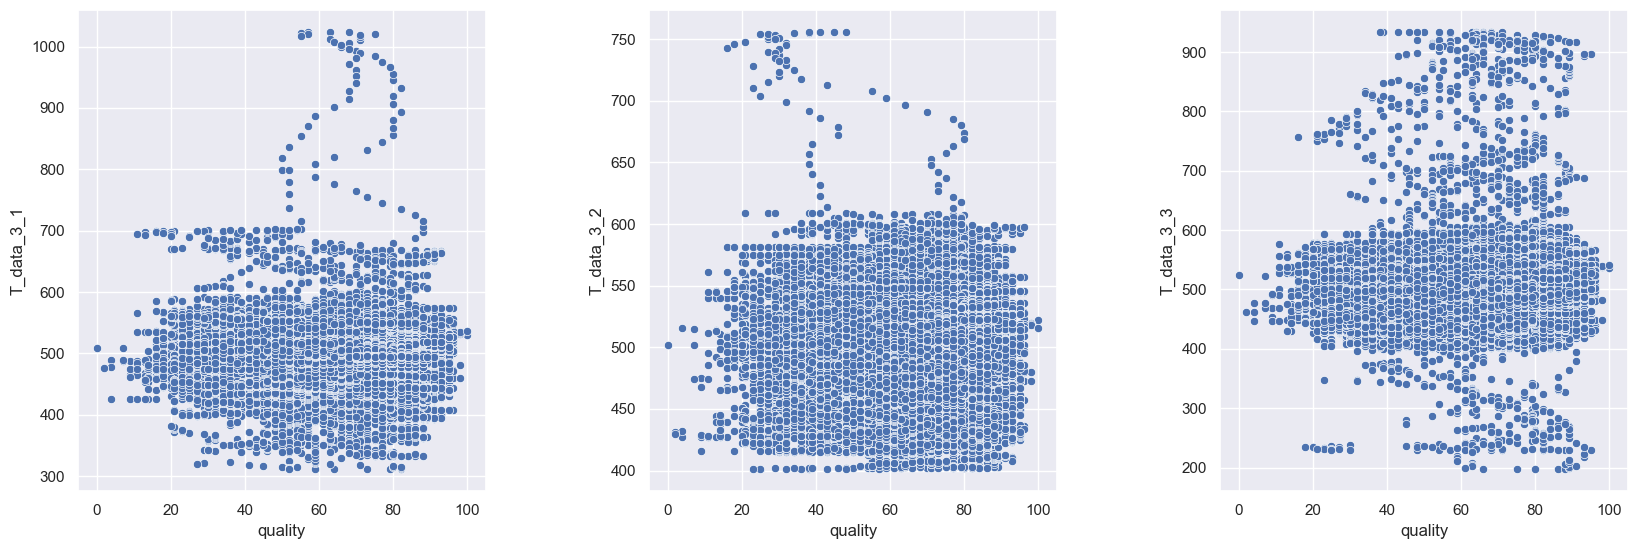

In [35]:
# quality vs temp in 3rd chamber

fig = plt.figure(figsize = (20,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(2, 3, 1)
sns.scatterplot(data=df, x="quality", y="T_data_3_1")

ax = fig.add_subplot(2, 3, 2)
sns.scatterplot(data=df, x="quality", y="T_data_3_2")

ax = fig.add_subplot(2, 3, 3) 
sns.scatterplot(data=df, x="quality", y="T_data_3_3")
   


- The temperature in the third chamber doesn't seem to have any severe effect on the quality of beans.
- The temperature in the third chamber usually lies between 400 and 600.

<Axes: xlabel='quality', ylabel='T_data_4_3'>

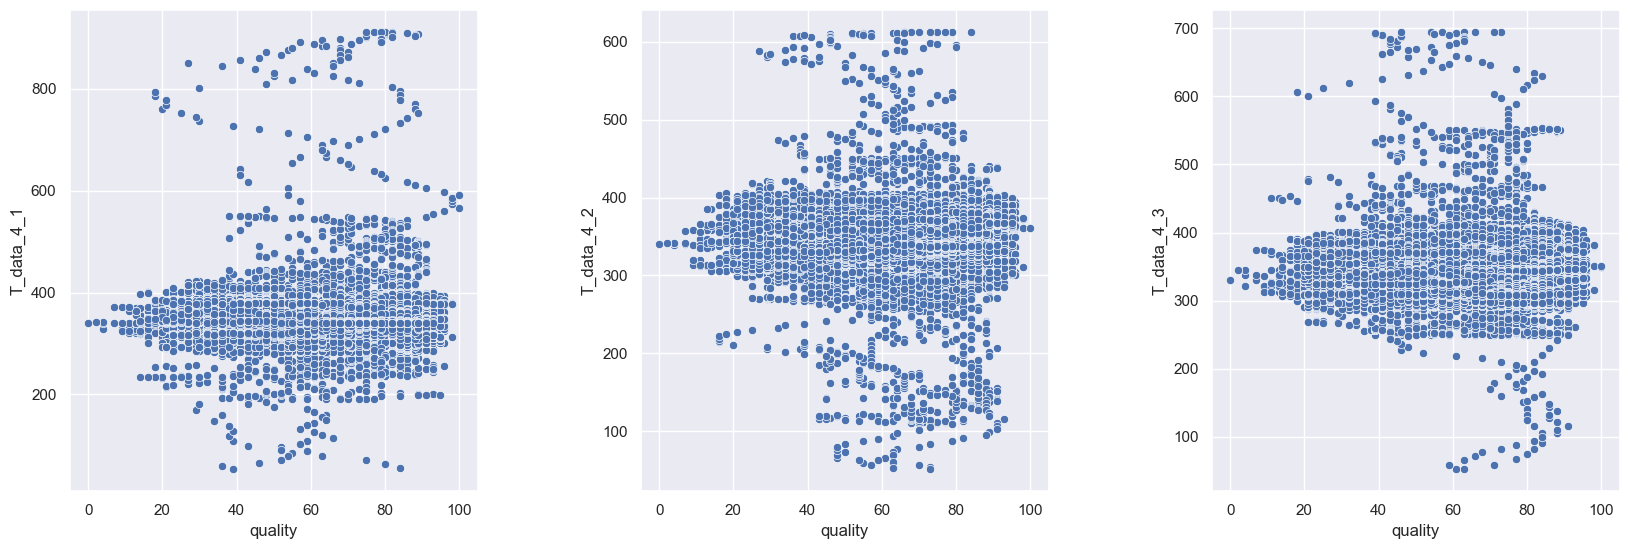

In [36]:
# quality vs temp in 4th chamber

fig = plt.figure(figsize = (20,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(2, 3, 1)
sns.scatterplot(data=df, x="quality", y="T_data_4_1")

ax = fig.add_subplot(2, 3, 2)
sns.scatterplot(data=df, x="quality", y="T_data_4_2")

ax = fig.add_subplot(2, 3, 3) 
sns.scatterplot(data=df, x="quality", y="T_data_4_3")
   


- The temperature in the fourth chamber usually lies between 200 and 450.
- The observations with temperatures in the range of 200 to 450 have better quality.

<Axes: xlabel='quality', ylabel='T_data_5_3'>

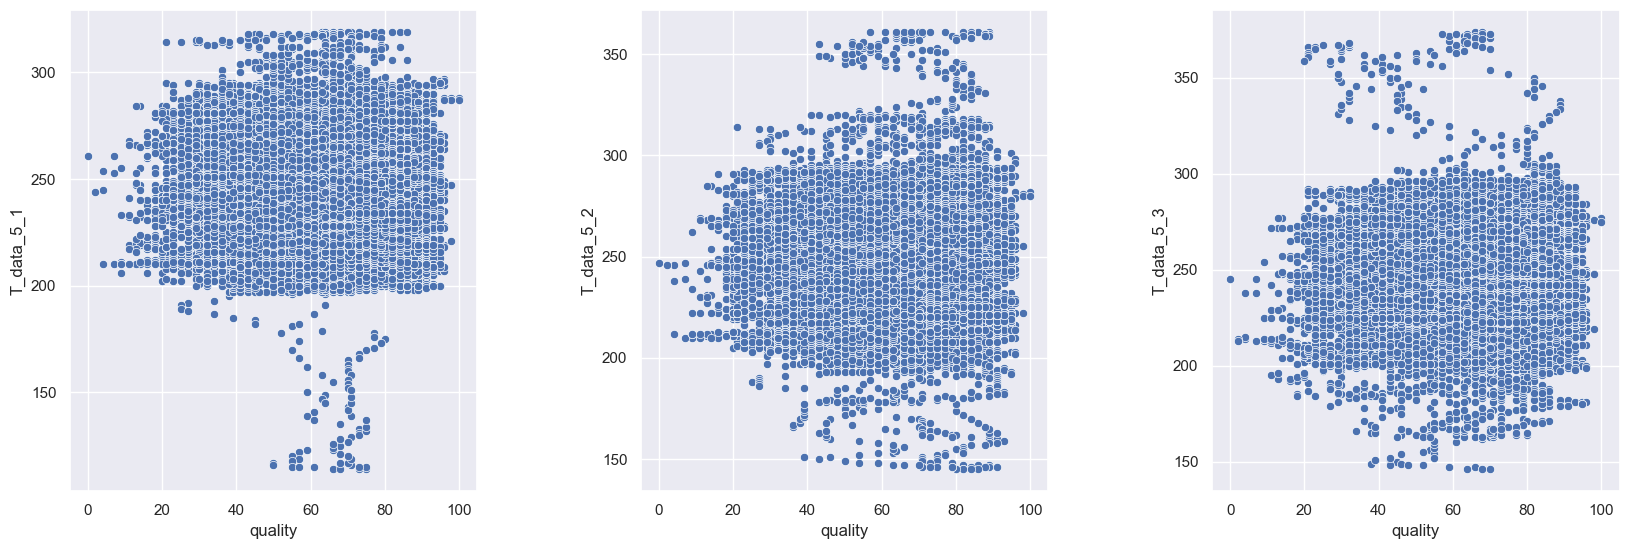

In [37]:
# quality vs temp in 5th chamber

fig = plt.figure(figsize = (20,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(2, 3, 1)
sns.scatterplot(data=df, x="quality", y="T_data_5_1")

ax = fig.add_subplot(2, 3, 2)
sns.scatterplot(data=df, x="quality", y="T_data_5_2")

ax = fig.add_subplot(2, 3, 3) 
sns.scatterplot(data=df, x="quality", y="T_data_5_3")
   


- The temperature in the fifth chamber doesn't seem to have any severe effect on the quality of beans.
- The temperature in the fifth chamber usually lies between 200 and 300.

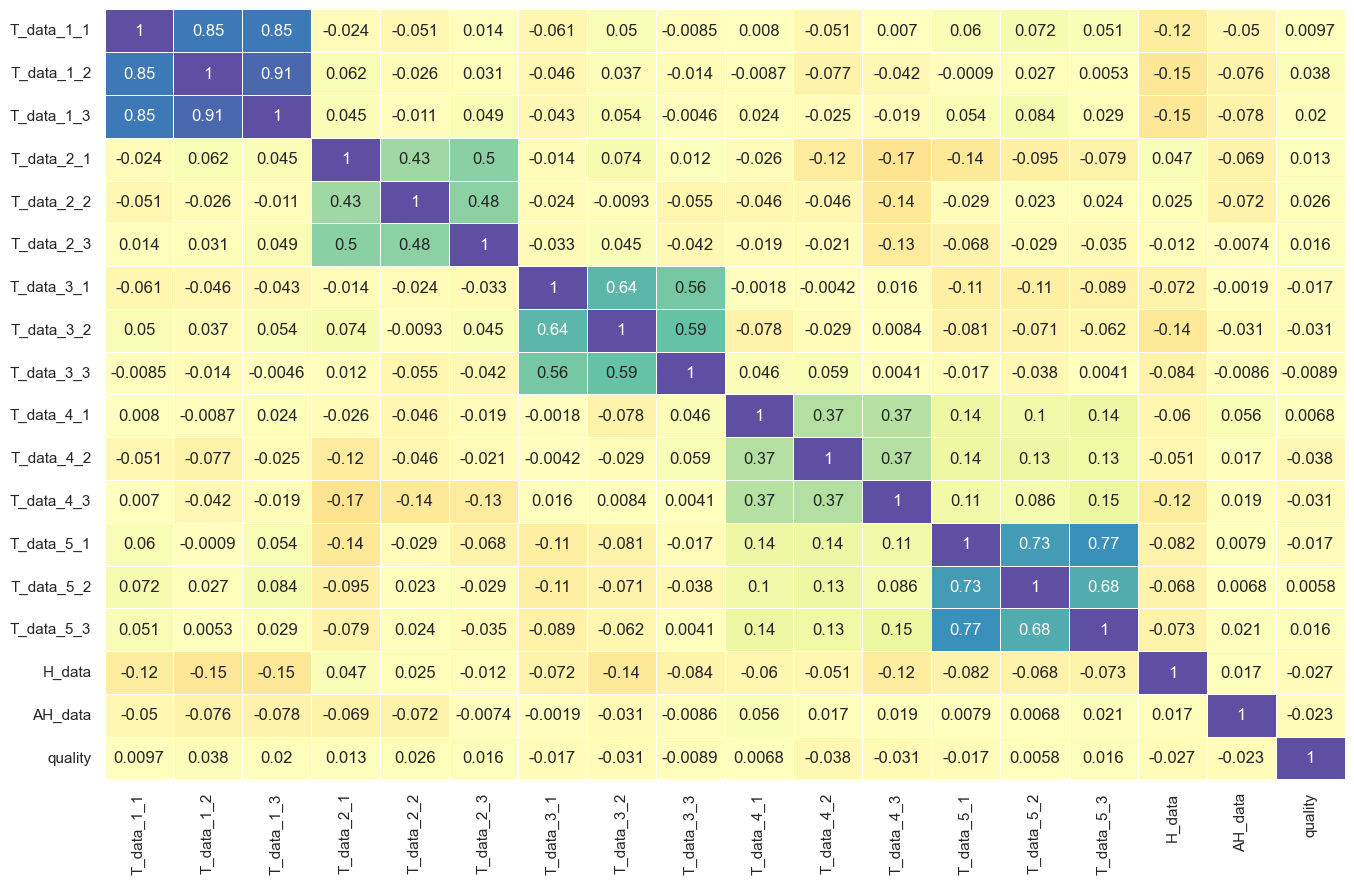

In [38]:
# Correlation matrix

sns.set(rc={"figure.figsize": (16, 10)})
sns.heatmap(
    df.corr(), annot=True, linewidths=0.5, center=0, cbar=False, cmap="Spectral"
)
plt.show()

- The temperatures obtained by different sensors inside the same chamber are correlated.

## Data Pre-Processing

### Data Preparation for Modeling

In [39]:
# Creating the copy of the dataframe
df1 = df.copy()

In [40]:
# Dividing train data into X and y 

X = df1.drop(["quality"], axis=1)
y = df1["quality"]

In [41]:
# Splitting data into training and validation set:

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=1)

X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=1
)

print(X_train.shape, X_val.shape, X_test.shape)

(17478, 17) (5827, 17) (5826, 17)


### Missing value imputation

- There were few missing values in AH_data and H_data, we will impute them using the median.
- And to avoid data leakage we will impute missing values after splitting train data into train and validation sets.

In [42]:
imputer = SimpleImputer(strategy="median")

In [43]:
# Fit and transform the train data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform the validation data
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_train.columns)

# Transform the test data
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_train.columns)

In [44]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

T_data_1_1    0
T_data_1_2    0
T_data_1_3    0
T_data_2_1    0
T_data_2_2    0
T_data_2_3    0
T_data_3_1    0
T_data_3_2    0
T_data_3_3    0
T_data_4_1    0
T_data_4_2    0
T_data_4_3    0
T_data_5_1    0
T_data_5_2    0
T_data_5_3    0
H_data        0
AH_data       0
dtype: int64
------------------------------
T_data_1_1    0
T_data_1_2    0
T_data_1_3    0
T_data_2_1    0
T_data_2_2    0
T_data_2_3    0
T_data_3_1    0
T_data_3_2    0
T_data_3_3    0
T_data_4_1    0
T_data_4_2    0
T_data_4_3    0
T_data_5_1    0
T_data_5_2    0
T_data_5_3    0
H_data        0
AH_data       0
dtype: int64
------------------------------
T_data_1_1    0
T_data_1_2    0
T_data_1_3    0
T_data_2_1    0
T_data_2_2    0
T_data_2_3    0
T_data_3_1    0
T_data_3_2    0
T_data_3_3    0
T_data_4_1    0
T_data_4_2    0
T_data_4_3    0
T_data_5_1    0
T_data_5_2    0
T_data_5_3    0
H_data        0
AH_data       0
dtype: int64


- All the missing values have been imputed.

## Model Building

**Let's create a function to calculate different metrics, so that we don't have to use the same code repeatedly for each model.**

In [45]:
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
        },
        index=[0],
    )

    return df_perf

### Decision Tree

In [46]:
dtree = DecisionTreeRegressor(random_state=1)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [47]:
dtree_model_train_perf = model_performance_regression(dtree, X_train, y_train)
dtree_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared
0,0.000,0.000,1.000,1.000


In [48]:
dtree_model_val_perf = model_performance_regression(dtree, X_val, y_val)
dtree_model_val_perf

,RMSE,MAE,R-squared,Adj. R-squared
0,7.438,5.202,0.789,0.789


* The decision tree model is overfitting the data. 

### Random Forest

In [49]:
rf_estimator = RandomForestRegressor(random_state=1)
rf_estimator.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [50]:
rf_estimator_model_train_perf = model_performance_regression(
    rf_estimator, X_train, y_train
)
rf_estimator_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared
0,2.022,1.502,0.985,0.985


In [51]:
rf_estimator_model_val_perf = model_performance_regression(rf_estimator, X_val, y_val)
rf_estimator_model_val_perf

,RMSE,MAE,R-squared,Adj. R-squared
0,5.307,4.004,0.893,0.893


* Random Forest model is slightly overfitting 

### Bagging Regressor

In [52]:
bag_estimator = BaggingRegressor(random_state=1)
bag_estimator.fit(X_train, y_train)

BaggingRegressor(random_state=1)

In [53]:
bag_estimator_model_train_perf = model_performance_regression(
    bag_estimator, X_train, y_train
)
bag_estimator_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared
0,2.632,1.815,0.975,0.975


In [54]:
bag_estimator_model_val_perf = model_performance_regression(bag_estimator, X_val, y_val)
bag_estimator_model_val_perf

,RMSE,MAE,R-squared,Adj. R-squared
0,5.916,4.408,0.867,0.866


* The RMSE values for the Bagging Regressor model are low for both the train and validation datasets.
* On both the train and validation datasets, the Bagging Regressor model generalizes well.

### Adaboost

In [55]:
ab_regressor = AdaBoostRegressor(random_state=1)
ab_regressor.fit(X_train, y_train)

AdaBoostRegressor(random_state=1)

In [56]:
ab_regressor_model_train_perf = model_performance_regression(
    ab_regressor, X_train, y_train
)
ab_regressor_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared
0,16.514,13.754,-0.001,-0.002


In [57]:
ab_regressor_model_val_perf = model_performance_regression(ab_regressor, X_val, y_val)
ab_regressor_model_val_perf

,RMSE,MAE,R-squared,Adj. R-squared
0,16.260,13.530,-0.006,-0.009


* The AdaBoost model is overfitting and does not generalize well on both the train and validation datasets.

### Gradient Boosting

In [58]:
gb_estimator = GradientBoostingRegressor(random_state=1)
gb_estimator.fit(X_train, y_train)

GradientBoostingRegressor(random_state=1)

In [59]:
gb_estimator_model_train_perf = model_performance_regression(
    gb_estimator, X_train, y_train
)
gb_estimator_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared
0,15.020,12.236,0.172,0.171


In [60]:
gb_estimator_model_val_perf = model_performance_regression(gb_estimator, X_val, y_val)
gb_estimator_model_val_perf

,RMSE,MAE,R-squared,Adj. R-squared
0,14.873,12.134,0.158,0.156


* The RMSE values for the Gradient Boost model are high for both the train and validation datasets.

### Xgboost

In [61]:
xgb_estimator = XGBRegressor(random_state=1)
xgb_estimator.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=1, ...)

In [62]:
xgb_estimator_model_train_perf = model_performance_regression(
    xgb_estimator, X_train, y_train
)
xgb_estimator_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared
0,8.255,6.440,0.750,0.750


In [63]:
xgb_estimator_model_val_perf = model_performance_regression(xgb_estimator, X_val, y_val)
xgb_estimator_model_val_perf

,RMSE,MAE,R-squared,Adj. R-squared
0,9.514,7.519,0.656,0.655


* The RMSE values for the XGBoost model are high for both the train and validation datasets.

## Model performance comparison

In [64]:
# Training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        bag_estimator_model_train_perf.T,
        ab_regressor_model_train_perf.T,
        gb_estimator_model_train_perf.T,
        xgb_estimator_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision tree",
    "Random forest",
    "Bagging Regressor",
    "Adaboost",
    "Gradient Boosting",
    "Xgboost",
]
print("Training performance comparison:")
models_train_comp_df.T

Training performance comparison:


,RMSE,MAE,R-squared,Adj. R-squared
Decision tree,0.000,0.000,1.000,1.000
Random forest,2.022,1.502,0.985,0.985
Bagging Regressor,2.632,1.815,0.975,0.975
Adaboost,16.514,13.754,-0.001,-0.002
Gradient Boosting,15.020,12.236,0.172,0.171
Xgboost,8.255,6.440,0.750,0.750


In [65]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        dtree_model_val_perf.T,
        rf_estimator_model_val_perf.T,
        bag_estimator_model_val_perf.T,
        ab_regressor_model_val_perf.T,
        gb_estimator_model_val_perf.T,
        xgb_estimator_model_val_perf.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Decision tree",
    "Random forest",
    "Bagging Regressor",
    "Adaboost",
    "Gradient Boosting",
    "Xgboost",
]
print("Validation performance comparison:")
models_val_comp_df.T

Validation performance comparison:


,RMSE,MAE,R-squared,Adj. R-squared
Decision tree,7.438,5.202,0.789,0.789
Random forest,5.307,4.004,0.893,0.893
Bagging Regressor,5.916,4.408,0.867,0.866
Adaboost,16.260,13.530,-0.006,-0.009
Gradient Boosting,14.873,12.134,0.158,0.156
Xgboost,9.514,7.519,0.656,0.655


**After looking at performance of all the models, let's decide which models can further improve with hyperparameter tuning**

- RMSE value is low and good Adj. R-squared values for the following models:
  - Random Forest 
  - Bagging Regressor
  - Decision Tree
- So, we will tune these 3 models.

## Hyperparameter Tuning

### Tuning Random Forest Regressor model

In [66]:
%%time 

rf_tuned = RandomForestRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {  
                'max_depth':[4, 6, 8, 10, None],
                'max_features': ['sqrt','log2',None],
                'n_estimators': [80, 90, 100, 110, 120]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
randomized_cv = RandomizedSearchCV(rf_tuned, parameters, scoring=scorer, n_iter=40, n_jobs = -1, cv=5, random_state=1)
randomized_cv = randomized_cv.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data
rf_tuned.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 110, 'max_features': 'log2', 'max_depth': None} with CV score=0.8740151805774847:
CPU times: user 7.37 s, sys: 281 ms, total: 7.65 s
Wall time: 1min 9s


In [67]:
# Creating new pipeline with best parameters
rf_tuned = RandomForestRegressor(
    random_state=1, max_depth=None, max_features="log2", n_estimators=110
)

rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_features='log2', n_estimators=110, random_state=1)

In [68]:
rf_tuned_train_perf = model_performance_regression(rf_tuned, X_train, y_train)
rf_tuned_train_perf

,RMSE,MAE,R-squared,Adj. R-squared
0,1.915,1.421,0.987,0.987


In [69]:
rf_tuned_val_perf = model_performance_regression(rf_tuned, X_val, y_val)
rf_tuned_val_perf

,RMSE,MAE,R-squared,Adj. R-squared
0,4.992,3.767,0.905,0.905


- After hyperparameter tuning, the Random Forest model's performance improved. 

### Tuning Bagging Regressor model

In [70]:
%%time 

# Defining the model
Model = BaggingRegressor(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
              'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [50, 100, 120, 150],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=20, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 120, 'max_samples': 0.9, 'max_features': 0.7} with CV score=0.8602137771073354:
CPU times: user 8.99 s, sys: 129 ms, total: 9.12 s
Wall time: 1min 11s


In [71]:
# Creating new pipeline with best parameters
bag_tuned = BaggingRegressor(
    random_state=1, max_samples=0.7, max_features=0.9, n_estimators=120
)

bag_tuned.fit(X_train, y_train)

BaggingRegressor(max_features=0.9, max_samples=0.7, n_estimators=120,
                 random_state=1)

In [72]:
bag_tuned_train_perf = model_performance_regression(bag_tuned, X_train, y_train)
bag_tuned_train_perf

,RMSE,MAE,R-squared,Adj. R-squared
0,2.944,2.229,0.968,0.968


In [73]:
bag_tuned_val_perf = model_performance_regression(bag_tuned, X_val, y_val)
bag_tuned_val_perf

,RMSE,MAE,R-squared,Adj. R-squared
0,5.763,4.397,0.874,0.873


- Bagging Regressor is slightly overfitting the train data but overall the performance has improved.

### Tuning Decision Tree Regressor model

In [74]:
%%time 

# Choose the type of classifier
dtree_tuned = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': list(np.arange(15,20)) + [None], 
              'min_samples_leaf': [1, 3] + [None],
              'max_leaf_nodes' : [5, 10, 15] + [None],
              'min_impurity_decrease': [0.001, 0.0]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
randomized_cv = RandomizedSearchCV(dtree_tuned, parameters, scoring=scorer,cv=5, n_jobs = -1, verbose = 2, n_iter = 100)
randomized_cv = randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': None, 'max_depth': None} with CV score=0.7302020073842068:
CPU times: user 449 ms, sys: 83.2 ms, total: 532 ms
Wall time: 2.97 s


In [75]:
dtree_tuned = DecisionTreeRegressor(
    random_state=1,
    max_depth=None,
    min_samples_leaf=1,
    max_leaf_nodes=None,
    min_impurity_decrease=0.001,
)

dtree_tuned.fit(X_train, y_train)

DecisionTreeRegressor(min_impurity_decrease=0.001, random_state=1)

In [76]:
dtree_tuned_train_perf = model_performance_regression(dtree_tuned, X_train, y_train)
dtree_tuned_train_perf

,RMSE,MAE,R-squared,Adj. R-squared
0,1.519,1.126,0.992,0.992


In [77]:
dtree_tuned_val_perf = model_performance_regression(dtree_tuned, X_val, y_val)
dtree_tuned_val_perf

,RMSE,MAE,R-squared,Adj. R-squared
0,7.633,5.387,0.778,0.778


- The decision tree model is overfitting and does not generalize well on both train and validation data.

## Model performance comparison and choosing the final model

In [78]:
# Training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree_tuned_train_perf.T,
        bag_tuned_train_perf.T,
        rf_tuned_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Tuned Decision Tree",
    "Tuned Bagging regressor",
    "Tuned Random forest",
]
print("Training performance comparison:")
models_train_comp_df.T

Training performance comparison:


,RMSE,MAE,R-squared,Adj. R-squared
Tuned Decision Tree,1.519,1.126,0.992,0.992
Tuned Bagging regressor,2.944,2.229,0.968,0.968
Tuned Random forest,1.915,1.421,0.987,0.987


In [79]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        dtree_tuned_val_perf.T,
        bag_tuned_val_perf.T,
        rf_tuned_val_perf.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Tuned Decision Tree",
    "Tuned Bagging regressor",
    "Tuned Random forest",
]
print("Validation performance comparison:")
models_val_comp_df.T

Validation performance comparison:


,RMSE,MAE,R-squared,Adj. R-squared
Tuned Decision Tree,7.633,5.387,0.778,0.778
Tuned Bagging regressor,5.763,4.397,0.874,0.873
Tuned Random forest,4.992,3.767,0.905,0.905


- For both the train and validation sets, Random Forest has a low RMSE and a high Adj. R-squared value.
- As a result, as the final model, we will use Random Forest tuned with oversampled data.

**Now we have our final model, let's find out how our model is performing on unseen test data**

In [80]:
# Let's check the performance on test set
rf_test = model_performance_regression(rf_tuned, X_test, y_test)
rf_test

,RMSE,MAE,R-squared,Adj. R-squared
0,4.980,3.753,0.906,0.906


- Let's check feature importance for Random Forest Regressor.

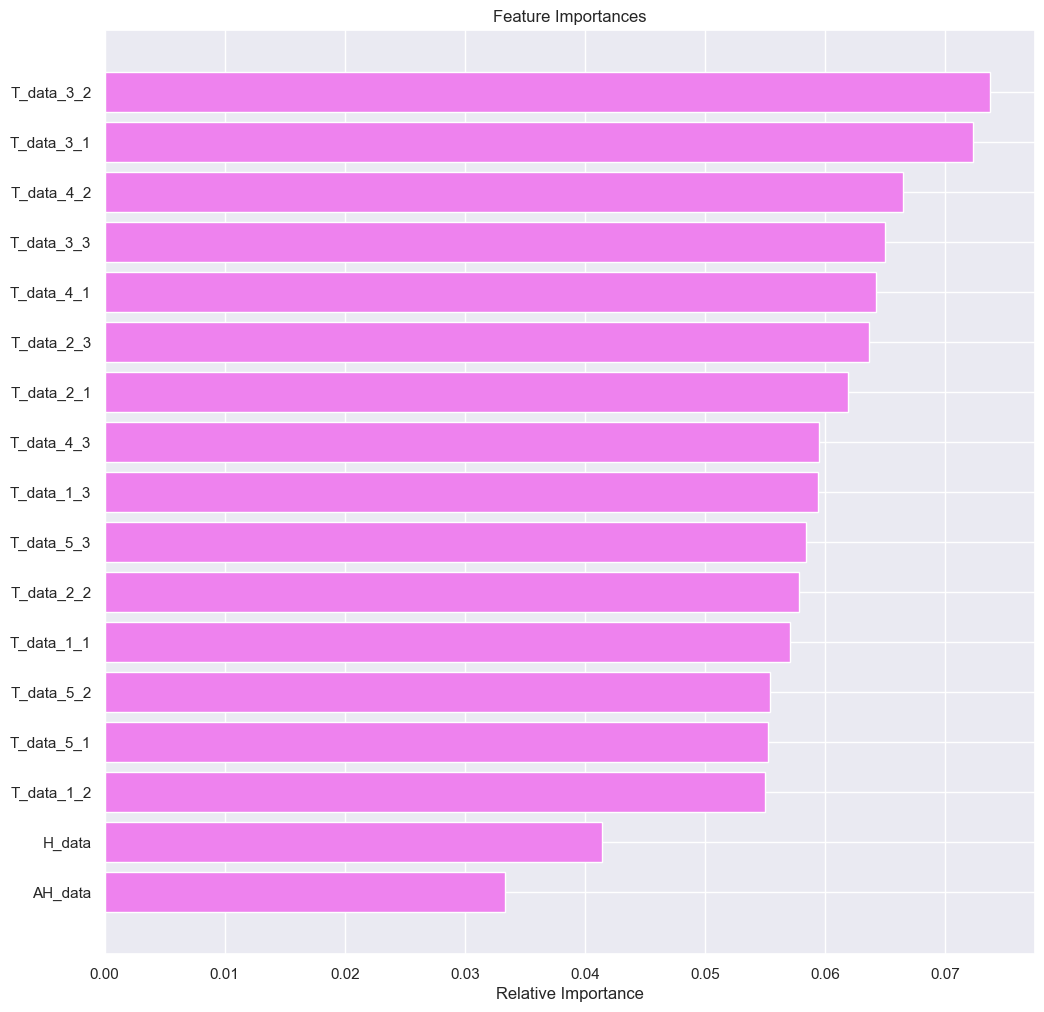

In [81]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- T_Data_3_2 is the most important feature followed by T_Data_3_1 and T_Data_4_2.

## Let's use Pipelines to build the final model

In [82]:
Model = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        (
            "Random forest",
            RandomForestRegressor(
                random_state=1, max_depth=None, max_features="log2", n_estimators=110
            ),
        ),
    ]
)

In [83]:
# Separating the target variable and other variables
X = df.drop(columns="quality")
Y = df["quality"]

In [84]:
# Splitting data into training and test set:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

print(X_train.shape, X_test.shape)

(20391, 17) (8740, 17)


In [85]:
Model.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('Random forest',
                 RandomForestRegressor(max_features='log2', n_estimators=110,
                                       random_state=1))])

In [86]:
# Let's check the performance on test set
Pipeline_model_test = model_performance_regression(Model, X_test, y_test)
Pipeline_model_test

,RMSE,MAE,R-squared,Adj. R-squared
0,4.475,3.388,0.924,0.924


## Business Insights and Conclusions

- Random forest regressor provides the best results with 90% R-squared and 3.7 MAE, hence this model can be used further for predictions.

- T_Data_3_2, T_Data_3_1 and T_Data_4_2 are the important features used by the predictive model, which shows that the temperature of the chamber (especially the 3rd and 4th ones) plays a very important role in deciding the quality of coffee beans.

- The quality rating provided by the model can be grouped using a business logic to determine the pricing strategy for the different quality coffee beans.

- This model can be used to automate material quality inspection during the manufacturing process in order to reduce human intervention while achieving human-level or better accuracy.